In [3]:
import pandas as pd

hogares = pd.read_excel("usu_hogar_T324.xlsx")
personas = pd.read_excel("usu_individual_T324.xlsx")

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

### Tablas de Referencia

#### ESTADO - Condición de Actividad
Tipo de variable: Nominal

In [9]:
estado = pd.DataFrame([(0, "Encuesta no realizada"), (1, "Ocupado"), (2, "Desocupado"), (3, "Inactivo"), (4, "Menor de 10 años")], columns=["ESTADO", "ESTADO_NOMBRE"])

##### Datos faltantes
No hay registros con valores indefinidos.

In [13]:
sum(personas["ESTADO"].isna())

0

##### Análisis de Frecuencias

In [17]:
personas.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts()

ESTADO_NOMBRE
Ocupado                  21031
Inactivo                 19519
Menor de 10 años          5601
Desocupado                1358
Encuesta no realizada       55
Name: count, dtype: int64

In [18]:
personas.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts(normalize=True)

ESTADO_NOMBRE
Ocupado                  0.442162
Inactivo                 0.410373
Menor de 10 años         0.117757
Desocupado               0.028551
Encuesta no realizada    0.001156
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7499be836ef0>,
 [Text(0.2584079283450647, 1.4064584396875766, 'Ocupado'),
  Text(-0.8596864870148416, -1.1427331902259954, 'Inactivo'),
  Text(1.2141490484167563, -0.7554747436074126, 'Menor de 10 años'),
  Text(1.423283193571161, -0.13843753428126931, 'Desocupado'),
  Text(1.4299905637401862, -0.005194960444953264, 'Encuesta no realizada')],
 [Text(0.18793303879641066, 1.0228788652273284, '44.22%'),
  Text(-0.6252265360107938, -0.8310786838007238, '41.04%'),
  Text(0.8830174897576408, -0.5494361771690273, '11.78%'),
  Text(1.035115049869935, -0.1006818431136504, '2.86%'),
  Text(1.03999313726559, -0.0037781530508751004, '0.12%')])

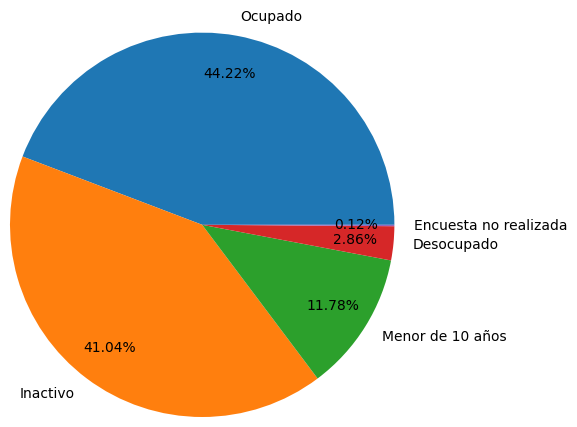

In [41]:
frecuencias = personas.merge(estado, how="inner", on="ESTADO")["ESTADO_NOMBRE"].value_counts()
plt.pie(frecuencias, labels=frecuencias.index, autopct="%.2f%%", pctdistance=0.8, labeldistance=1.1, radius=1.3)


#### NIVEL_ED - Nivel Educativo
Tipo de Variable: Ordinal

In [4]:
nivel_educativo = pd.DataFrame([
    (1, "Primario incompleto (incluye educación especial)"),
    (2, "Primario completo"),
    (3, "Secundario incompleto"),
    (4, "Secundario completo"),
    (5, "Superior universitario incompleto"),
    (6, "Superior universitario completo"),
    (7, "Sin instrucción"),
    (9, "Ns/Nr"),
    ], columns=["NIVEL_ED", "NIVEL_ED_NOMBRE"])

##### Datos faltantes
No hay registros con valores indefinidos.

In [5]:
sum(personas["NIVEL_ED"].isna())

0

##### Análisis de Frecuencias

In [25]:
personas.merge(nivel_educativo, how="inner", on="NIVEL_ED")[["NIVEL_ED","NIVEL_ED_NOMBRE"]].value_counts()

NIVEL_ED  NIVEL_ED_NOMBRE                                 
4         Secundario completo                                 10276
3         Secundario incompleto                                9764
6         Superior universitario completo                      6700
1         Primario incompleto (incluye educación especial)     6623
5         Superior universitario incompleto                    5883
2         Primario completo                                    5237
7         Sin instrucción                                      3081
Name: count, dtype: int64

In [8]:
personas.merge(nivel_educativo, how="inner", on="NIVEL_ED")["NIVEL_ED_NOMBRE"].value_counts(normalize=True)

NIVEL_ED_NOMBRE
Secundario completo                                 0.216046
Secundario incompleto                               0.205281
Superior universitario completo                     0.140863
Primario incompleto (incluye educación especial)    0.139244
Superior universitario incompleto                   0.123686
Primario completo                                   0.110104
Sin instrucción                                     0.064776
Name: proportion, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Primario incompleto (incluye educación especial)'),
  Text(1, 0, 'Primario completo'),
  Text(2, 0, 'Secundario incompleto'),
  Text(3, 0, 'Secundario completo'),
  Text(4, 0, 'Superior universitario incompleto'),
  Text(5, 0, 'Superior universitario completo'),
  Text(6, 0, 'Sin instrucción')])

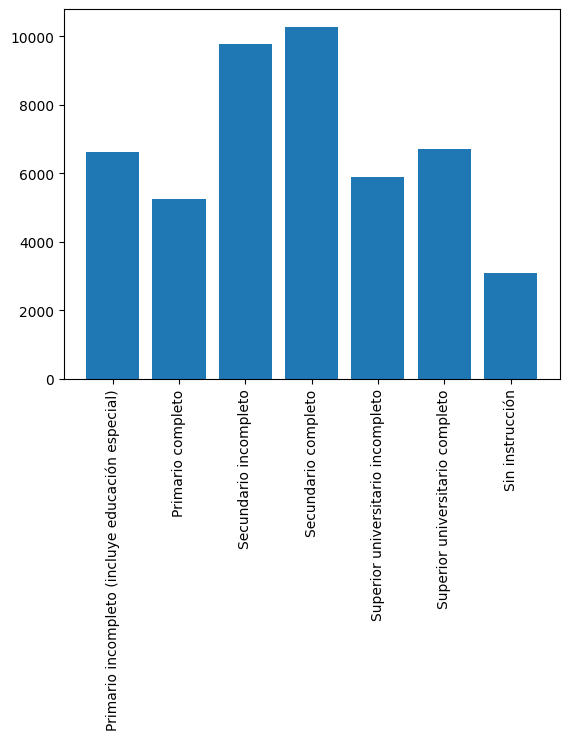

In [31]:
frecuencias = personas.merge(nivel_educativo, how="inner", on="NIVEL_ED")[["NIVEL_ED","NIVEL_ED_NOMBRE"]].value_counts().reset_index(name='NIVEL_ED_COUNT').sort_values("NIVEL_ED")
plt.bar(frecuencias["NIVEL_ED_NOMBRE"], frecuencias["NIVEL_ED_COUNT"])
# frecuencias.reset_index(name='NIVEL_ED_COUNT').sort_values("NIVEL_ED")
# plt.bar(frecuencias.index, frecuencias)
plt.xticks(rotation=90)

### Análisis de ingresos

#### IPCF - Ingreso per Cápita Familiar

##### Datos Faltantes

No hay registros con datos faltantes

In [43]:
sum(personas["IPCF"].isna())

0

In [48]:

print("Media", np.round(np.mean(personas["IPCF"]),2))
print("Desvío estándar", np.round(np.std(personas["IPCF"]),2))
print("Media", np.round(np.mean(personas["IPCF"]),2))

Media 269332.6
Desvío estándar 348132.66
